<a href="https://colab.research.google.com/github/Cintia0528/Data_Analysis-COPD_Death_Rates_in_US-Uganda/blob/main/Our_World_in_Data_Junior_Data_Scientist_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0.&nbsp; Project Overview



### Task:
Write a Python script that calculates both the **crude death rate** and the **age-standardized death rate** for all ages in both the United States and Uganda for 2019.
## Resources:


*   UN World Population Prospects (2022) — Population Estimates 1950-2021
*   WHO Standard Population — Table 1 in 'Ahmad OB, Boschi-Pinto C, Lopez AD, Murray CJ, Lozano R, Inoue M (2001). Age standardization of rates: a new WHO standard.
*   Table of age-specific death rates of COPD

### Procedural:


1.   Collect data:
Population data for crude death downloaded as csv from [UN Population Estimates](https://population.un.org/wpp/Download/Standard/Population/), then imported to Colab. Population data per age group also downloaded from above and imported. Table simply copied  from the [Notion](https://owid.notion.site/Data-analysis-exercise-Our-World-in-Data-Junior-Data-Scientist-application-ab287a3c07264b4d91aadc436021b8c0) page and saved as csv.
2.   Data consistency:
Population data is per thousands, while the death rates are per 100,000.
3.   Calculation: Define crude and age-standardized death rates and calculate outcomes
4.   Analyze outcomes and communicate findings
5.   Make note of any assumptions, or comments


### Findings:
1.  Crude Death Rate, USA: 2164.74
2.  Crude Death Rate, Uganda: 2058.62
3.  ASDR, USA: 5159699.30
4.  ASDR, Uganda: 574075.35

### Comments:

1.  Crude death:
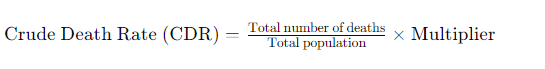

2.  Age specific death: 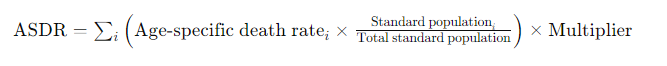
3. For both measurements, I chose the multiplier of 100,000 to make the data more interpretable. I.e.: Crude death per 100,000 people.
4. If given more time, I would have liked to webscrape the table. Simply copying it was not the most elegant, but the fastest solution.
5. Looking back, I should have not downloaded to csv's but got the population by summing the age groups.


## 1.&nbsp; Population


In [ ]:
import pandas as pd

In [ ]:
# Reading data
url = "https://drive.google.com/file/d/1ynIYRXmkiBPRWiMlQAdq2j1q3g-pigxn/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
population = pd.read_csv(path)

<ipython-input-112-35fb7f80c55d>:4: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  population = pd.read_csv(path)


### 1.1 &nbsp; Uganda


In [ ]:
# First find the row for Uganda in 2019
uganda_2019 = population.loc[(population['Location'] == "Uganda") & (population['Time'] == 2019)]
# Then extract the population and save as a variable for further use
uganda_population_2019 = uganda_2019.iloc[0]['PopTotal']
# Whole population
final_uganda_population_2019 = uganda_population_2019 * 1000

In [ ]:
final_uganda_population_2019

42949080.0

### 1.2 &nbsp; USA

In [ ]:
# Figure out how the United States may be written (USA, United States, or United States of America) with regex
population[population['Location'].str.contains('United', case=False)]

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
57754,NaN,98100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECA: United Nations Economic Commission for Af...,2,Medium,1950,1950.5,113335.147,113926.061,227261.208,7.761
57755,NaN,98100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECA: United Nations Economic Commission for Af...,2,Medium,1951,1951.5,115770.452,116414.272,232184.724,7.929
57756,NaN,98100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECA: United Nations Economic Commission for Af...,2,Medium,1952,1952.5,118292.289,118982.865,237275.155,8.103
57757,NaN,98100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECA: United Nations Economic Commission for Af...,2,Medium,1953,1953.5,120894.469,121619.958,242514.427,8.282
57758,NaN,98100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECA: United Nations Economic Commission for Af...,2,Medium,1954,1954.5,123574.102,124334.605,247908.707,8.466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515665,262.0,840,31.0,USA,US,840.0,4.0,Country/Area,918.0,United States of America,207,Lower 95 PI,2096,2096.5,147409.224,150282.115,299545.109,32.746
515666,262.0,840,31.0,USA,US,840.0,4.0,Country/Area,918.0,United States of America,207,Lower 95 PI,2097,2097.5,146497.408,149522.313,297876.458,32.563
515667,262.0,840,31.0,USA,US,840.0,4.0,Country/Area,918.0,United States of America,207,Lower 95 PI,2098,2098.5,145646.516,148670.814,295844.406,32.341
515668,262.0,840,31.0,USA,US,840.0,4.0,Country/Area,918.0,United States of America,207,Lower 95 PI,2099,2099.5,145047.307,147555.848,293706.699,32.108


In [ ]:
# Finding the row for the USA in 2019
usa_2019 = population.loc[(population['Location'] == "United States of America") & (population['Time'] == 2019)]
# Extract population
usa_population_2019 = usa_2019.iloc[0]['PopTotal']
# Whole population
final_usa_population_2019 = usa_population_2019 * 1000

In [ ]:
final_usa_population_2019


334319671.0

## 2.&nbsp; Death Rates Table

In [ ]:
# Reading data
url = "https://drive.google.com/file/d/1Zi3l0SeRQ4G5TWtaoAjs2Ombr_pVaCaA/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
deathrates = pd.read_csv(path)

In [ ]:
# check data types
deathrates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age group (years)                18 non-null     object 
 1   Death rate, United States, 2019  18 non-null     float64
 2   Death rate, Uganda, 2019         18 non-null     float64
dtypes: float64(2), object(1)
memory usage: 560.0+ bytes


In [ ]:
deathrates

,Age group (years),"Death rate, United States, 2019","Death rate, Uganda, 2019"
0,0-4,0.04,0.40
1,5-9,0.02,0.17
2,10-14,0.02,0.07
3,15-19,0.02,0.23
4,20-24,0.06,0.38
5,25-29,0.11,0.40
6,30-34,0.29,0.75
7,35-39,0.56,1.11
8,40-44,1.42,2.04
9,45-49,4.00,5.51


## 3.&nbsp; Calculations

### 3.1 &nbsp; Crude Deaths

In [ ]:
# Population data
population_usa_2019 = final_usa_population_2019
population_uganda_2019 = final_uganda_population_2019

# Step 1: Calculate total deaths for each country
total_deaths_usa = sum(deathrates['Death rate, United States, 2019'] * population_usa_2019 / 100000)
total_deaths_uganda = sum(deathrates['Death rate, Uganda, 2019'] * population_uganda_2019 / 100000)

# Step 2: Calculate the crude death rate
cdr_usa = total_deaths_usa / population_usa_2019 * 100000
cdr_uganda = total_deaths_uganda / population_uganda_2019 * 100000

# Round the crude death rates to two decimal places
cdr_usa = round(cdr_usa, 2)
cdr_uganda = round(cdr_uganda, 2)

# Print crude death rates
print("Crude Death Rate (per 100,000 population):")
print("United States:", cdr_usa)
print("Uganda:", cdr_uganda)


Crude Death Rate (per 100,000 population):
United States: 2164.74
Uganda: 2058.62


### 3.2 &nbsp; Age Standardized Deaths

In [ ]:
# Reading data, since for age standardized deaths we need the population per age groups
url = "https://drive.google.com/file/d/1nHwH10BdcmROQQDSPirfoD4yfqRGDii3/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
population_age_groups = pd.read_csv(path)

<ipython-input-122-2b18a0eb393a>:4: DtypeWarning: Columns (3,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  population_age_groups = pd.read_csv(path)


#### 3.2.1 &nbsp; Data Cleaning

In [ ]:
# Checking data types and if the data imported correctly
population_age_groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20524 entries, 0 to 20523
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Index                                 20524 non-null  int64  
 1   Variant                               20524 non-null  object 
 2   Region, subregion, country or area *  20524 non-null  object 
 3   Notes                                 5403 non-null   object 
 4   Location code                         20524 non-null  int64  
 5   ISO3 Alpha-code                       16992 non-null  object 
 6   ISO2 Alpha-code                       16920 non-null  object 
 7   SDMX code**                           20232 non-null  float64
 8   Type                                  20524 non-null  object 
 9   Parent code                           20524 non-null  int64  
 10  Year                                  20520 non-null  float64
 11  0-4            

In [ ]:
# Dropping columns that are not needed
columns_to_drop = ['Variant', 'Notes', 'Location code', 'ISO3 Alpha-code',
                   'ISO2 Alpha-code', 'SDMX code**', 'Type', 'Parent code']

population_age_groups = population_age_groups.drop(columns=columns_to_drop)

In [ ]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [ ]:
# Renaming columns that were corrupted - Excel displayed it as date automatically
# Renaming "Region, subregion, country or area *" to simply "Location"
population_age_groups = population_age_groups.rename(columns={'9-May': '5-9', '14-Oct': '10-14', 'Region, subregion, country or area *':'Location'})

#### 3.2.2 &nbsp; Create Population per Age Group Dataframes

In [ ]:
uganda_age_groups = population_age_groups.loc[(population_age_groups['Location'] == 'Uganda') & (population_age_groups['Year'] == 2019)]
usa_age_groups = population_age_groups.loc[(population_age_groups['Location'] == 'United States of America') & (population_age_groups['Year'] == 2019)]

In [ ]:
# Population data for Uganda and the USA (per 1000 individuals)
uganda_population_data_per_1000 = {
    "0-4": 7329, "5-9": 6614, "10-14": 5899, "15-19": 5151, "20-24": 4348, "25-29": 3500,
    "30-34": 2619, "35-39": 1903, "40-44": 1504, "45-49": 1235, "50-54": 953, "55-59": 687,
    "60-64": 500, "65-69": 353, "70-74": 197, "75-79": 93, "80-84": 44, "85+": 15
}

usa_population_data_per_1000 = {
    "0-4": 19849, "5-9": 20697, "10-14": 22092, "15-19": 21895, "20-24": 21872, "25-29": 23407,
    "30-34": 22842, "35-39": 22297, "40-44": 20695, "45-49": 21244, "50-54": 21346, "55-59": 22348,
    "60-64": 20941, "65-69": 17501, "70-74": 13689, "75-79": 9273, "80-84": 6119, "85+": 3977
}

# Multiply the population data by 1000 to get the actual population
uganda_population_data = {age_group: count * 1000 for age_group, count in uganda_population_data_per_1000.items()}
usa_population_data = {age_group: count * 1000 for age_group, count in usa_population_data_per_1000.items()}

# Create DataFrames for population data
uganda_population_df = pd.DataFrame.from_dict(uganda_population_data, orient='index', columns=["Population, Uganda, 2019"])
usa_population_df = pd.DataFrame.from_dict(usa_population_data, orient='index', columns=["Population, USA, 2019"])

# Reset index to make age group a column - needed for merging
uganda_population_df.reset_index(inplace=True)
usa_population_df.reset_index(inplace=True)

# Rename the columns so I can merge the two tables (not necessary, but I see it better as one DF)
uganda_population_df.columns = ["Age group (years)", "Population, Uganda, 2019"]
usa_population_df.columns = ["Age group (years)", "Population, USA, 2019"]


In [ ]:
# Merge population DataFrames with the death rates table based on age groups
final_df = pd.merge(deathrates, uganda_population_df, left_index=True, right_index=True)
final_df = pd.merge(final_df, usa_population_df, left_index=True, right_index=True)


#### 3.2.3 &nbsp; Clean up final data frame

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age group (years)_x              18 non-null     object 
 1   Death rate, United States, 2019  18 non-null     float64
 2   Death rate, Uganda, 2019         18 non-null     float64
 3   Age group (years)_y              18 non-null     object 
 4   Population, Uganda, 2019         18 non-null     int64  
 5   Age group (years)                18 non-null     object 
 6   Population, USA, 2019            18 non-null     int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ KB


In [ ]:
# Dropping age columns as they are 3 times due to merging
age_columns_to_drop = ['Age group (years)_y', 'Age group (years)']

final_df = final_df.drop(columns=age_columns_to_drop)
final_df = final_df.rename(columns={'Age group (years)_x': 'Age groups'})

In [ ]:
final_df

,Age groups,"Death rate, United States, 2019","Death rate, Uganda, 2019","Population, Uganda, 2019","Population, USA, 2019"
0,0-4,0.04,0.40,7329000,19849000
1,5-9,0.02,0.17,6614000,20697000
2,10-14,0.02,0.07,5899000,22092000
3,15-19,0.02,0.23,5151000,21895000
4,20-24,0.06,0.38,4348000,21872000
5,25-29,0.11,0.40,3500000,23407000
6,30-34,0.29,0.75,2619000,22842000
7,35-39,0.56,1.11,1903000,22297000
8,40-44,1.42,2.04,1504000,20695000
9,45-49,4.00,5.51,1235000,21244000


#### 3.2.4 &nbsp; Calculate ASDR

In [ ]:
# Calculate the weighted sum of death rates for each country
weighted_sum_usa = (final_df['Death rate, United States, 2019'] * final_df['Population, USA, 2019']).sum()
weighted_sum_uganda = (final_df['Death rate, Uganda, 2019'] * final_df['Population, Uganda, 2019']).sum()

# Calculate the total population for each country
total_population_usa = final_df['Population, USA, 2019'].sum()
total_population_uganda = final_df['Population, Uganda, 2019'].sum()

# Calculate the age-standardized death rate for each country
asdr_usa = (weighted_sum_usa / total_population_usa) * 100000
asdr_uganda = (weighted_sum_uganda / total_population_uganda) * 100000

# Print the results
print("Age-Standardized Death Rate (per 100,000 population):")
print("United States:", round(asdr_usa, 2))
print("Uganda:", round(asdr_uganda, 2))


Age-Standardized Death Rate (per 100,000 population):
United States: 5159699.3
Uganda: 574075.35


### 3.3 &nbsp; Final Results

In [ ]:
# Results
results = {
    "Metric": ["Crude Death Rate", "Age-Standardized Death Rate"],
    "United States": [cdr_usa, round(asdr_usa, 2)],
    "Uganda": [cdr_uganda, round(asdr_uganda, 2)]
}

# Create DataFrame
results_df = pd.DataFrame(results)
results_df

,Metric,United States,Uganda
0,Crude Death Rate,2164.74,2058.62
1,Age-Standardized Death Rate,5159699.30,574075.35


## 4.&nbsp; Conclusion

Crude Death Rate tells us how many deaths per 100,000 people occurred in each country without considering the age distribution.

Age-Standardized Death Rate adjusts for differences in the age distribution between the two populations, making it easier to compare the mortality rates. It tells us how many deaths per 100,000 people you would expect if the age distribution in both countries were the same.

In both metrics, the number of deaths are higher in the USA, which seems contradictory due to the socioeconomic status and general infrastructural difference between the two countries.

Analysis of the reasons are beyond the scope of this project, and the time however, the median age of each population may be a significant factor to consider.  